=== MENU BIẾN ĐỔI ẢNH MIỀN KHÔNG GIAN ===
I: Image Inverse Transformation
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching


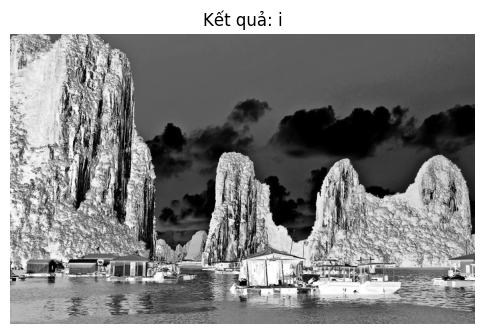

✅ Đã lưu ảnh: output/ha-long-bay-in-vietnam_i.png


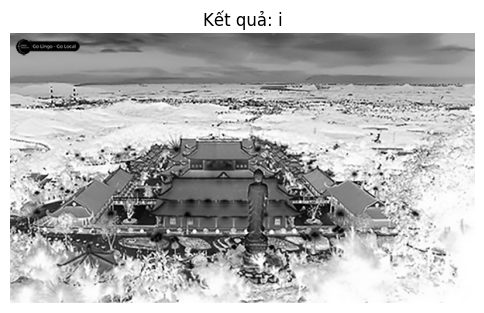

✅ Đã lưu ảnh: output/pagoda_i.png


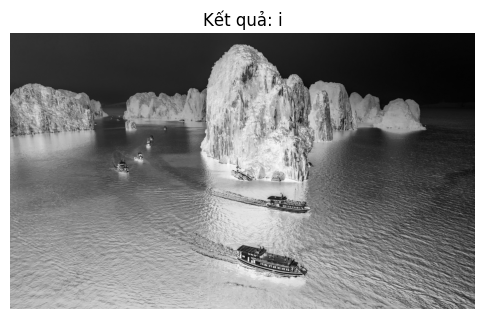

✅ Đã lưu ảnh: output/quang_ninh_i.png


In [2]:
#Bài 1
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Tạo thư mục lưu kết quả
os.makedirs("output", exist_ok=True)

# 1. Image Inverse
def inverse_image(img_array):
    return 255 - img_array

# 2. Gamma Correction
def gamma_correction(img_array, gamma=2.2):
    normalized = img_array / 255.0
    corrected = np.power(normalized, gamma)
    return np.uint8(corrected * 255)

# 3. Log Transformation
def log_transformation(img_array):
    c = 255 / np.log(1 + np.max(img_array))
    log_img = c * np.log(1 + img_array)
    return np.uint8(log_img)

# 4. Histogram Equalization
def histogram_equalization(img_array):
    return cv2.equalizeHist(img_array)

# 5. Contrast Stretching
def contrast_stretching(img_array):
    min_val = np.min(img_array)
    max_val = np.max(img_array)
    stretched = (img_array - min_val) * 255.0 / (max_val - min_val)
    return np.uint8(stretched)

# Xử lý ảnh theo lựa chọn
def apply_transformation(choice, img_array):
    if choice == 'I':
        return inverse_image(img_array)
    elif choice == 'G':
        return gamma_correction(img_array)
    elif choice == 'L':
        return log_transformation(img_array)
    elif choice == 'H':
        return histogram_equalization(img_array)
    elif choice == 'C':
        return contrast_stretching(img_array)
    else:
        return None

# Hiển thị và lưu ảnh
def show_and_save(result, original_path, suffix):
    img_result = Image.fromarray(result)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_result, cmap='gray')
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    base_name = os.path.basename(original_path)
    name, ext = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    img_result.save(save_path)
    print(f"✅ Đã lưu ảnh: {save_path}")

# Menu chính
def main():
    folder = "exercise"
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    print("=== MENU BIẾN ĐỔI ẢNH MIỀN KHÔNG GIAN ===")
    print("I: Image Inverse Transformation")
    print("G: Gamma Correction")
    print("L: Log Transformation")
    print("H: Histogram Equalization")
    print("C: Contrast Stretching")

    choice = input("Chọn một phím (I/G/L/H/C): ").strip().upper()

    if choice not in ['I', 'G', 'L', 'H', 'C']:
        print("❌ Lựa chọn không hợp lệ.")
        return

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path).convert('L')  # Chuyển ảnh sang grayscale
        img_array = np.asarray(img)
        result = apply_transformation(choice, img_array)
        if result is not None:
            show_and_save(result, img_path, choice.lower())

if __name__ == "__main__":
    main()


=== MENU BIẾN ĐỔI ẢNH MIỀN TẦN SỐ ===
F: Fast Fourier Transform
L: Butterworth Lowpass Filter
H: Butterworth Highpass Filter


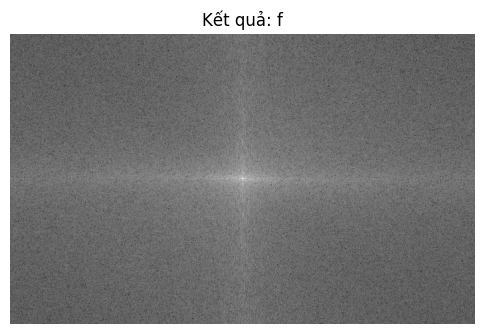

✅ Đã lưu ảnh: output/ha-long-bay-in-vietnam_f.png


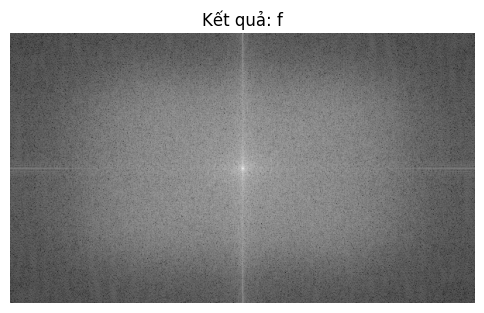

✅ Đã lưu ảnh: output/pagoda_f.png


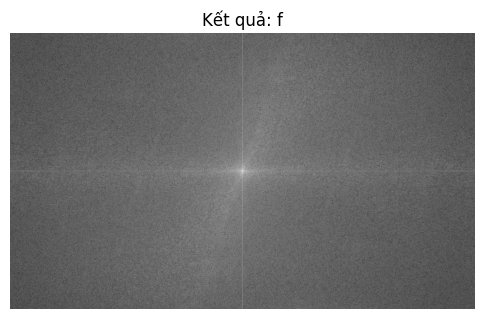

✅ Đã lưu ảnh: output/quang_ninh_f.png


In [3]:
#Bài 2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.fftpack

# Tạo thư mục lưu ảnh kết quả
os.makedirs("output", exist_ok=True)

# 1. Fast Fourier Transform
def fast_fourier(img_array):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)
    magnitude = 20 * np.log(np.abs(F_shifted) + 1)
    normalized = 255 * (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    return normalized.astype(np.uint8)

# 2. Butterworth Lowpass Filter
def butterworth_lowpass(img_array, d0=30.0, n=2):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)
    M, N = img_array.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N).reshape(1, -1)
    D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
    H = 1 / (1 + (D / d0)**(2 * n))
    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    return np.uint8(255 * (img_back - img_back.min()) / (img_back.max() - img_back.min()))

# 3. Butterworth Highpass Filter
def butterworth_highpass(img_array, d0=30.0, n=2):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)
    M, N = img_array.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N).reshape(1, -1)
    D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))  # tránh chia cho 0
    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    return np.uint8(255 * (img_back - img_back.min()) / (img_back.max() - img_back.min()))

# Áp dụng theo lựa chọn người dùng
def apply_transformation(choice, img_array):
    if choice == 'F':
        return fast_fourier(img_array)
    elif choice == 'L':
        return butterworth_lowpass(img_array)
    elif choice == 'H':
        return butterworth_highpass(img_array)
    else:
        return None

# Hiển thị và lưu ảnh
def show_and_save(result, original_path, suffix):
    img_result = Image.fromarray(result)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_result, cmap='gray')
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    base_name = os.path.basename(original_path)
    name, _ = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    img_result.save(save_path)
    print(f"✅ Đã lưu ảnh: {save_path}")

# Menu chính
def main():
    folder = "exercise"
    if not os.path.exists(folder):
        print(f"❌ Thư mục '{folder}' không tồn tại.")
        return

    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not images:
        print("❌ Không tìm thấy ảnh trong thư mục 'exercise'.")
        return

    print("=== MENU BIẾN ĐỔI ẢNH MIỀN TẦN SỐ ===")
    print("F: Fast Fourier Transform")
    print("L: Butterworth Lowpass Filter")
    print("H: Butterworth Highpass Filter")

    choice = input("Chọn một phím (F/L/H): ").strip().upper()

    if choice not in ['F', 'L', 'H']:
        print("❌ Lựa chọn không hợp lệ.")
        return

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path).convert('L')
        img_array = np.asarray(img)
        result = apply_transformation(choice, img_array)
        if result is not None:
            show_and_save(result, img_path, choice.lower())

if __name__ == "__main__":
    main()


➡ Biến đổi áp dụng: I


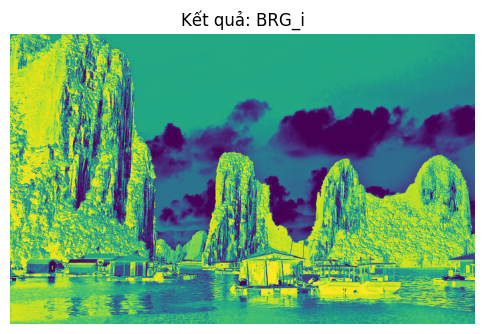

✅ Đã lưu ảnh: output/ha-long-bay-in-vietnam_BRG_i.png
➡ Biến đổi áp dụng: H


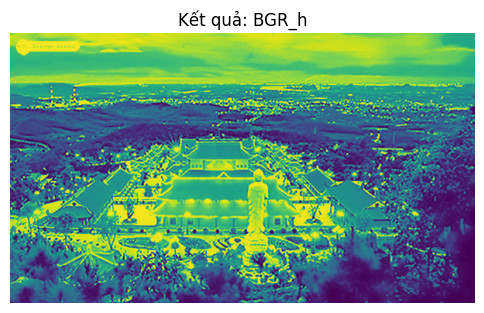

✅ Đã lưu ảnh: output/pagoda_BGR_h.png
➡ Biến đổi áp dụng: H


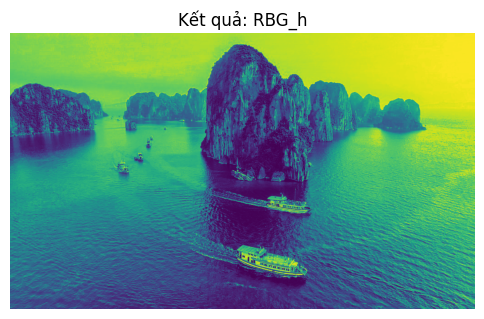

✅ Đã lưu ảnh: output/quang_ninh_RBG_h.png


In [4]:
#bài 3
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Tạo thư mục lưu kết quả
os.makedirs("output", exist_ok=True)

# Các phép biến đổi ảnh trong miền không gian
def inverse_image(img_array):
    return 255 - img_array

def gamma_correction(img_array, gamma=2.2):
    norm = img_array / 255.0
    corrected = np.power(norm, gamma)
    return np.uint8(corrected * 255)

def log_transformation(img_array):
    c = 255 / np.log(1 + np.max(img_array))
    log_img = c * np.log(1 + img_array)
    return np.uint8(log_img)

def histogram_equalization(img_array):
    hist, bins = np.histogram(img_array.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    result = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)
    return result.reshape(img_array.shape).astype(np.uint8)

def contrast_stretching(img_array):
    min_val = np.min(img_array)
    max_val = np.max(img_array)
    stretched = (img_array - min_val) * 255.0 / (max_val - min_val)
    return np.uint8(stretched)

# Áp dụng ngẫu nhiên một phép biến đổi
def apply_random_transformation(img_array):
    methods = {
        'I': inverse_image,
        'G': gamma_correction,
        'L': log_transformation,
        'H': histogram_equalization,
        'C': contrast_stretching
    }
    method_key = random.choice(list(methods.keys()))
    print(f"➡ Biến đổi áp dụng: {method_key}")
    return methods[method_key](img_array), method_key

# Đổi thứ tự màu ngẫu nhiên
def shuffle_rgb(img_array):
    channels = [0, 1, 2]
    random.shuffle(channels)
    return img_array[:, :, channels], ''.join(['RGB'[i] for i in channels])

# Hiển thị và lưu ảnh
def show_and_save(result_img, original_path, suffix):
    img_result = Image.fromarray(result_img)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_result)
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    base_name = os.path.basename(original_path)
    name, _ = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    img_result.save(save_path)
    print(f"✅ Đã lưu ảnh: {save_path}")

# Chương trình chính
def main():
    folder = "exercise"
    if not os.path.exists(folder):
        print("❌ Thư mục 'exercise' không tồn tại.")
        return

    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not images:
        print("❌ Không có ảnh trong thư mục.")
        return

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path).convert('RGB')
        img_array = np.asarray(img)

        # Ngẫu nhiên hoán đổi kênh màu RGB
        shuffled_img, color_order = shuffle_rgb(img_array)

        # Chuyển sang grayscale để áp dụng biến đổi miền không gian
        gray_img = Image.fromarray(shuffled_img).convert('L')
        gray_array = np.asarray(gray_img)

        # Áp dụng biến đổi ngẫu nhiên
        transformed_img, transform_key = apply_random_transformation(gray_array)

        # Hiển thị và lưu
        show_and_save(transformed_img, img_path, f"{color_order}_{transform_key.lower()}")

if __name__ == "__main__":
    main()


➡ Biến đổi áp dụng: F


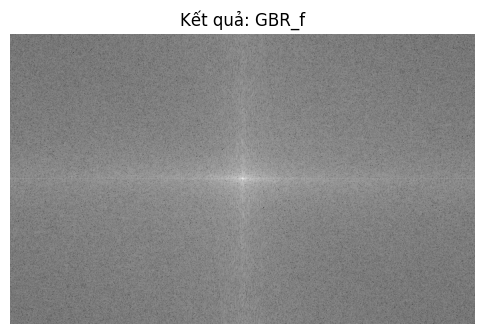

✅ Đã lưu ảnh: output/ha-long-bay-in-vietnam_GBR_f.png
➡ Biến đổi áp dụng: F


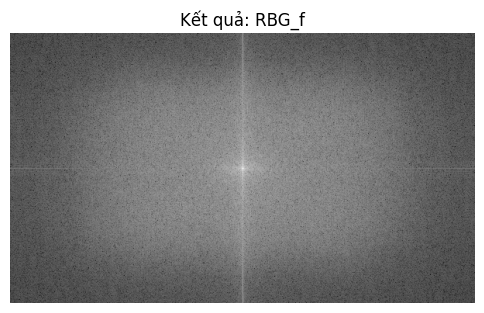

✅ Đã lưu ảnh: output/pagoda_RBG_f.png
➡ Biến đổi áp dụng: F


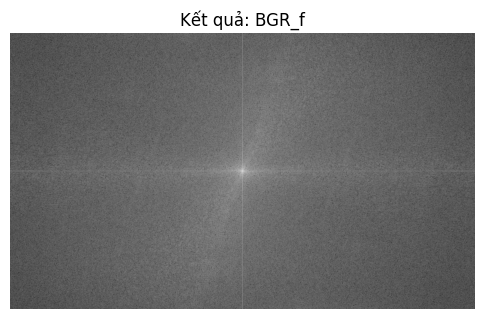

✅ Đã lưu ảnh: output/quang_ninh_BGR_f.png


In [5]:
#Bài 4
import os
import random
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import scipy.fftpack

# Tạo thư mục lưu ảnh kết quả
os.makedirs("output", exist_ok=True)

# 1. Fast Fourier Transform
def fast_fourier(img_array):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)
    magnitude = 20 * np.log(np.abs(F_shifted) + 1)
    normalized = 255 * (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    return normalized.astype(np.uint8)

# 2. Butterworth Lowpass Filter
def butterworth_lowpass(img_array, d0=30.0, n=2):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)
    M, N = img_array.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N).reshape(1, -1)
    D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
    H = 1 / (1 + (D / d0)**(2 * n))
    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    return np.uint8(255 * (img_back - img_back.min()) / (img_back.max() - img_back.min()))

# 3. Butterworth Highpass Filter
def butterworth_highpass(img_array, d0=30.0, n=2):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)
    M, N = img_array.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N).reshape(1, -1)
    D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))  # tránh chia cho 0
    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    return np.uint8(255 * (img_back - img_back.min()) / (img_back.max() - img_back.min()))

# Áp dụng bộ lọc theo yêu cầu
def apply_filter(img, method_key):
    pil_img = Image.fromarray(img)
    if method_key == 'L':
        print("➡ Áp dụng Min Filter sau Lowpass.")
        return np.asarray(pil_img.filter(ImageFilter.MinFilter(size=3)))
    elif method_key == 'H':
        print("➡ Áp dụng Max Filter sau Highpass.")
        return np.asarray(pil_img.filter(ImageFilter.MaxFilter(size=3)))
    return img

# Đổi thứ tự màu ngẫu nhiên
def shuffle_rgb(img_array):
    channels = [0, 1, 2]
    random.shuffle(channels)
    return img_array[:, :, channels], ''.join(['RGB'[i] for i in channels])

# Chọn và áp dụng phép biến đổi ngẫu nhiên
def apply_random_frequency_transform(img_array):
    methods = {
        'F': fast_fourier,
        'L': butterworth_lowpass,
        'H': butterworth_highpass
    }
    method_key = random.choice(list(methods.keys()))
    print(f"➡ Biến đổi áp dụng: {method_key}")
    gray = Image.fromarray(img_array).convert('L')
    gray_array = np.asarray(gray)
    transformed = methods[method_key](gray_array)
    transformed = apply_filter(transformed, method_key)
    return transformed, method_key

# Hiển thị và lưu ảnh
def show_and_save(result, original_path, suffix):
    img_result = Image.fromarray(result)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_result, cmap='gray')
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    base_name = os.path.basename(original_path)
    name, _ = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    img_result.save(save_path)
    print(f"✅ Đã lưu ảnh: {save_path}")

# Chương trình chính
def main():
    folder = "exercise"
    if not os.path.exists(folder):
        print("❌ Thư mục 'exercise' không tồn tại.")
        return

    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not images:
        print("❌ Không có ảnh trong thư mục.")
        return

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path).convert('RGB')
        img_array = np.asarray(img)

        # 1. Tráo kênh màu RGB
        shuffled_img, color_order = shuffle_rgb(img_array)

        # 2. Biến đổi miền tần số + filter tùy chọn
        transformed_img, method_key = apply_random_frequency_transform(shuffled_img)

        # 3. Hiển thị và lưu
        show_and_save(transformed_img, img_path, f"{color_order}_{method_key.lower()}")

if __name__ == "__main__":
    main()
